<a href="https://colab.research.google.com/github/tigrannh/Data-Science-ML-projects/blob/main/knn_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Nearest Neighbors classification

In [ ]:
import numpy as np
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt
%matplotlib inline  

## Your task
In this notebook code to perform k-NN classification is provided. However, some functions are incomplete. Your task is to fill in the missing code and run the entire notebook. 

You are only allowed to use the imported packages. Importing anything else is NOT allowed. 

In the beginning of every function there is docstring, which specifies the format of input and output. Write your code in a way that adheres to it.
You may only use plain python and `numpy` functions (i.e. no scikit-learn classifiers).

## Load dataset
The iris data set (https://en.wikipedia.org/wiki/Iris_flower_data_set) is loaded and split into train and test parts by the function `load_dataset`.

In [ ]:
def load_dataset(split):
    """Load and split the dataset into training and test parts.
    
    Parameters
    ----------
    split : float in range (0, 1)
        Fraction of the data used for training.
    
    Returns
    -------
    X_train : array, shape (N_train, 4)
        Training features.
    y_train : array, shape (N_train)
        Training labels.
    X_test : array, shape (N_test, 4)
        Test features.
    y_test : array, shape (N_test)
        Test labels.
    """
    dataset = datasets.load_iris()
    X, y = dataset['data'], dataset['target']
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=123, test_size=(1 - split))
    return X_train, X_test, y_train, y_test

In [ ]:
# prepare data
split = 0.75
X_train, X_test, y_train, y_test = load_dataset(split)

## Plot dataset
Since the data has 4 features, 16 scatterplots (4x4) are plotted showing the dependencies between each pair of features.

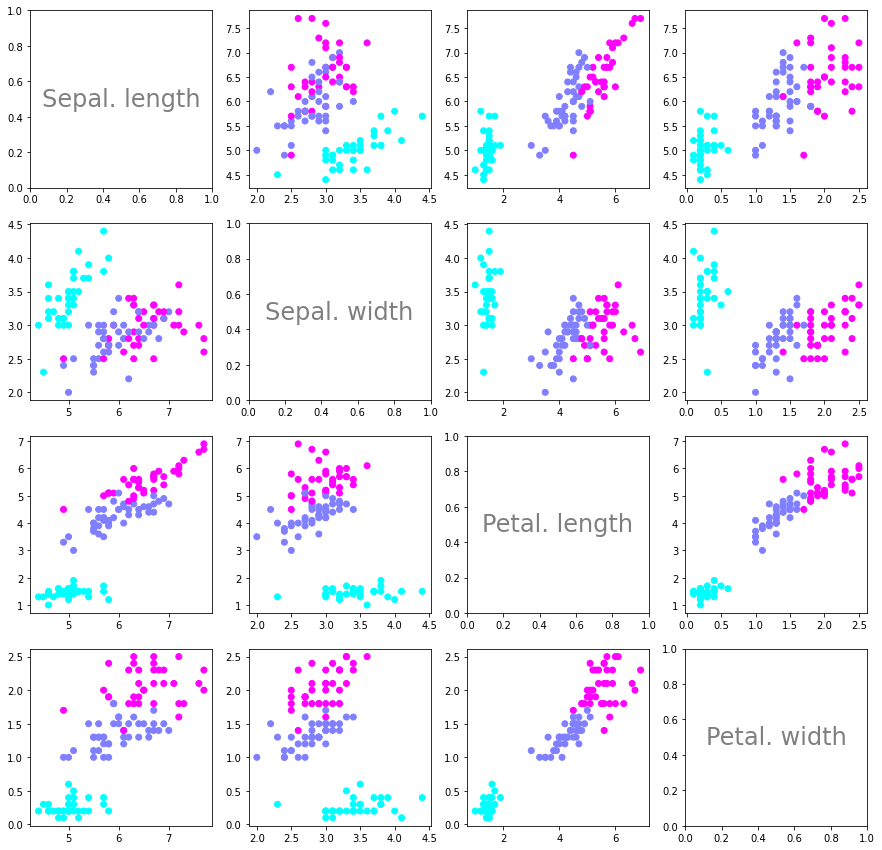

In [ ]:
f, axes = plt.subplots(4, 4,figsize=(15, 15))
for i in range(4):
    for j in range(4):
        if j == 0 and i == 0:
            axes[i,j].text(0.5, 0.5, 'Sepal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 1 and i == 1:
            axes[i,j].text(0.5, 0.5, 'Sepal. width', ha='center', va='center', size=24, alpha=.5)
        elif j == 2 and i == 2:
            axes[i,j].text(0.5, 0.5, 'Petal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 3 and i == 3:
            axes[i,j].text(0.5, 0.5, 'Petal. width', ha='center', va='center', size=24, alpha=.5)
        else:
            axes[i,j].scatter(X_train[:,j],X_train[:,i], c=y_train, cmap=plt.cm.cool)

## Task 1: Euclidean distance
Compute Euclidean distance between two data points.

In [ ]:
def euclidean_distance(x1, x2):
    """Compute Euclidean distance between two data points.
    
    Parameters
    ----------
    x1 : array, shape (4)
        First data point.
    x2 : array, shape (4)
        Second data point.
    
    Returns
    -------
    distance : float
        Euclidean distance between x1 and x2.
    """
    
    return np.sqrt(np.sum((x1-x2)**2))

## Task 2: get k nearest neighbors' labels
Get the labels of the *k* nearest neighbors of the datapoint *x_new*.

In [ ]:
def get_neighbors_labels(X_train, y_train, x_new, k):
    """Get the labels of the k nearest neighbors of the datapoint x_new.
    
    Parameters
    ----------
    X_train : array, shape (N_train, 4)
        Training features.
    y_train : array, shape (N_train)
        Training labels.
    x_new : array, shape (4)
        Data point for which the neighbors have to be found.
    k : int
        Number of neighbors to return.
        
    Returns
    -------
    neighbors_labels : array, shape (k)
        Array containing the labels of the k nearest neighbors.
    """
    distances = []
    for i in range(len(X_train)):
     distances.append(euclidean_distance(X_train[i], x_new))
    a = np.argsort(distances)[:k]
    return y_train[a]


    

## Task 3: get the majority label
For the previously computed labels of the *k* nearest neighbors, compute the actual response. I.e. give back the class of the majority of nearest neighbors. In case of a tie, choose the "lowest" label (i.e. the order of tie resolutions is 0 > 1 > 2).

In [ ]:
def get_response(neighbors_labels, num_classes=3):
    """Predict label given the set of neighbors.
    
    Parameters
    ----------
    neighbors_labels : array, shape (k)
        Array containing the labels of the k nearest neighbors.
    num_classes : int
        Number of classes in the dataset.
    
    Returns
    -------
    y : int
        Majority class among the neighbors.
    """
    resp = {}
    for i in neighbors_labels:
      if resp.get(X_train[i]) == 0:
        X_train[i] = 1
      else:
        X_train[i] +=1
      maxx = max(resp.values())
      out = num_classes
      for i, j in resp.items():
        if j == maxx and i < out:
          out = i
    return X_train[i]

## Task 4: compute accuracy
Compute the accuracy of the generated predictions.

In [ ]:
def compute_accuracy(y_pred, y_test):
    """Compute accuracy of prediction.
    
    Parameters
    ----------
    y_pred : array, shape (N_test)
        Predicted labels.
    y_test : array, shape (N_test)
        True labels.
    """
    
    correct = 0
	
    for i in range(len(y_test)):
      if y_test[i] == y_pred[i]:
        correct+=1
    return (correct/float(len(y_test))) * 100.0

In [ ]:
# This function is given, nothing to do here.
def predict(X_train, y_train, X_test, k):
    """Generate predictions for all points in the test set.
    
    Parameters
    ----------
    X_train : array, shape (N_train, 4)
        Training features.        
    y_train : array, shape (N_train)
        Training labels.
    X_test : array, shape (N_test, 4)
        Test features.
    k : int
        Number of neighbors to consider.
    
    Returns
    -------
    y_pred : array, shape (N_test)
        Predictions for the test data.
    """
    y_pred = []
    for x_new in X_test:
        neighbors = get_neighbors_labels(X_train, y_train, x_new, k)
        y_pred.append(get_response(neighbors))
    y_pred = np.array(y_pred)
    return y_pred

## Testing
Should output an accuracy of 0.9473684210526315.

In [ ]:
# prepare data
split = 0.75
X_train, X_test, y_train, y_test = load_dataset(split)
print('Training set: {0} samples'.format(X_train.shape[0]))
print('Test set: {0} samples'.format(X_test.shape[0]))

# generate predictions
k = 3
y_pred = predict(X_train, y_train, X_test, k)
accuracy = compute_accuracy(y_pred, y_test)
print('Accuracy = {0}'.format(accuracy))

Training set: 112 samples
Test set: 38 samples


TypeError: ignored

---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
accuracy_score(pred, y_test)

0.9473684210526315